In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob 
import numpy as np
from keras import optimizers
from keras.models import Model
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, concatenate, Conv2D, BatchNormalization, Activation, SeparableConv2D, MaxPooling2D, add
from keras.layers import Input, Dense
import cv2
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Load Data

In [ ]:
X_CLAHE = np.load('/content/drive/MyDrive/Database/covid19_data/covid19_clahe/clahe_288_X_0_255.npy')
X_original = np.load('/content/drive/MyDrive/Database/covid19_data/covid19_original/original_X_0_255.npy')

y = np.load('/content/drive/MyDrive/Database/covid19_data/covid19_original/original_y_0_255.npy')
# print(y_)
# print(X_CLAHE[:,:,:,:1].shape)
X_CLAHE = X_CLAHE[:,:,:,:1]/255
X_original = X_original[:,:,:,:1]/255

# print(X_CLAHE.shape, X_original.shape)
X_CLAHE = X_CLAHE.astype("float16")
X_original = X_original.astype("float16")

y = to_categorical(y)

#Stack

In [ ]:
X = np.concatenate((X_CLAHE, X_original), axis=3)
print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10, stratify = y_test)
print(X_test.shape)
print(y_test.shape)

(3875, 224, 224, 2)
(387, 224, 224, 2)
(387, 3)


In [ ]:
def count_y(y):
  los_count={}
  for i in range(y.shape[1]):
      los_count[i] = 0
  y_arg = (np.argmax(y,axis=1))
  for i in range(len(y_arg)):
    los_count[y_arg[i]]+=1
  return los_count

In [ ]:
print("y", count_y(y))
# print("y_train", count_y(y_train))
# print("y_test ", count_y(y_test))
# print("y_val  ", count_y(y_val))

y {0: 1197, 1: 1340, 2: 1338}


# File Path


In [ ]:
import os
filepath="/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/"
folder = os.path.exists(filepath)
if not folder:
  #如果不存在，則建立新目錄
  os.makedirs(filepath)
  print('-----建立成功-----')

else:
  #如果目錄已存在，則不建立，提示目錄已存在
  print(filepath+'目錄已存在')

/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/目錄已存在


#Save History

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import Callback
count = 0
# temp_count = 0
class SaveHistory(Callback):
  def on_train_begin(self, logs={}):
    self.accuracy = []
    self.loss = []
    self.val_accuracy = []
    self.val_loss = []

  def on_epoch_end(self, epoch, logs={}):

    self.accuracy.append(logs["accuracy"])
    self.loss.append(logs["loss"])
    self.val_accuracy.append(logs["val_accuracy"])
    self.val_loss.append(logs["val_loss"])

    model.save(filepath+ 'last.h5')
    np.save(filepath+ 'accuracy.npy', self.accuracy)
    np.save(filepath+ 'loss.npy', self.loss)
    np.save(filepath+ 'val_accuracy.npy', self.val_accuracy)
    np.save(filepath+ 'val_loss.npy', self.val_loss)

# class KF_SaveHistory(Callback):
#   def on_train_begin(self, logs={}):
#     global all_acc
#     self.accuracy = []
#     self.loss = []

#   def on_epoch_end(self, epoch, logs={}):
#     self.accuracy.append(logs["accuracy"])
#     self.loss.append(logs["loss"])
#     model.save(filepath+ 'last.h5')
#     np.save(filepath+ 'accuracy.npy', self.accuracy)
#     np.save(filepath+ 'loss.npy', self.loss)

#   def on_train_end(self, logs={}):
#     all_acc.append(model.evaluate(X[train_index], y[train_index])[1])
#     print(all_acc)
#     print(sum(all_acc)/len(all_acc))

#K折

In [ ]:
# KF = KFold(n_splits=5, random_state=1, shuffle=True)
# train_index = []
# test_index = []
# for train_index_temp, test_index_temp in KF.split(X):
#   train_index.append(train_index_temp)
#   test_index.append(test_index_temp)
# train_index = np.array(train_index)
# test_index = np.array(test_index)
# print(train_index.shape)
# print(test_index.shape)
# np.save("/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/train_index", train_index)
# np.save("/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/test_index", test_index)

(5, 3100)
(5, 775)


In [ ]:

# from keras.applications.densenet import DenseNet201
# KF = KFold(n_splits=5, random_state=1, shuffle=True)
# KFold_count = 0
# train_index = np.load("/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/train_index.npy")
# test_index = np.load("/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/test_index.npy")

# model = DenseNet201(weights=None, include_top=False, input_shape=[224, 224, X.shape[3]])
# model_output = model.output
# GlobalAveragePooling_layer = GlobalAveragePooling2D(name='avg_pool')(model_output)
# predictions_layer = Dense(3, activation='softmax', name='predictions')(GlobalAveragePooling_layer)
# model = Model(inputs=model.input, outputs=predictions_layer)
# # model.summary()

# import os
# filepath="/content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/"+str(KFold_count)+"/"
# folder = os.path.exists(filepath)
# if not folder:
#   #如果不存在，則建立新目錄
#   os.makedirs(filepath)
#   print('-----建立成功-----')

# else:
#   #如果目錄已存在，則不建立，提示目錄已存在
#   print(filepath+'目錄已存在')

# checkpoint = ModelCheckpoint(filepath+'best.h5', monitor='loss', verbose=1, save_best_only=True, mode='auto', save_weights_only = False)
# # LR_function=ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
# reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=0.0000001, verbose=1)
# stop = EarlyStopping(monitor='loss', min_delta=0, patience=20, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
# opt = optimizers.Adam(learning_rate=0.1)
# model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])
# history = model.fit(X[train_index[KFold_count]], y[train_index[KFold_count]], batch_size = 16, epochs = 100, shuffle=True, callbacks=[reduce_lr, checkpoint, stop, KF_SaveHistory()])
# model.save(filepath+'last.h5')

/usr/local/lib/python3.7/dist-packages/keras/applications/imagenet_utils.py:333: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 2 input channels.
  str(input_shape[-1]) + ' input channels.')


-----建立成功-----
Epoch 1/100
194/194 [==============================] - 151s 311ms/step - loss: 3.1834 - accuracy: 0.5791

Epoch 00001: loss improved from inf to 1.31223, saving model to /content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/0/best.h5
Epoch 2/100
194/194 [==============================] - 57s 293ms/step - loss: 0.2749 - accuracy: 0.8987

Epoch 00002: loss improved from 1.31223 to 0.27110, saving model to /content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/0/best.h5
Epoch 3/100
194/194 [==============================] - 57s 294ms/step - loss: 0.2014 - accuracy: 0.9228

Epoch 00003: loss improved from 0.27110 to 0.19909, saving model to /content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/0/best.h5
Epoch 4/100
194/194 [==============================] - 57s 293ms/step - loss: 0.1754 - accuracy: 0.9355

Epoch 00004: loss improved from 0.19909 to 0.19120, saving model to /content/drive/MyDrive/Dat

#Make model

In [ ]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet201
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2

model = DenseNet201(weights=None, include_top=False, input_shape=[224, 224, X_train.shape[3]])
model_output = model.output
GlobalAveragePooling_layer = GlobalAveragePooling2D(name='avg_pool')(model_output)
predictions_layer = Dense(3, activation='softmax', name='predictions')(GlobalAveragePooling_layer)
model = Model(inputs=model.input, outputs=predictions_layer)
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint(filepath+'best.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_weights_only = False)

# LR_function=ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0000001, verbose=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto', baseline=None, restore_best_weights=False)
opt = optimizers.Adam(lr=0.1)
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])
history = model.fit(X_train, y_train, batch_size = 16, epochs = 1000,validation_data =(X_val, y_val), shuffle=True, callbacks=[reduce_lr, checkpoint, stop, SaveHistory()])

score = model.evaluate(X_test, y_test)
print(score[1])

model.save(filepath+'last.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/1000
194/194 [==============================] - 173s 413ms/step - loss: 4.0687 - accuracy: 0.5911 - val_loss: 20.0391 - val_accuracy: 0.5206

Epoch 00001: val_loss improved from inf to 20.03909, saving model to /content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/best.h5
Epoch 2/1000
194/194 [==============================] - 60s 311ms/step - loss: 0.3036 - accuracy: 0.8894 - val_loss: 0.3175 - val_accuracy: 0.9072

Epoch 00002: val_loss improved from 20.03909 to 0.31747, saving model to /content/drive/MyDrive/Database/covid19_data/New_Net/DenseNet201_random_state10/best.h5
Epoch 3/1000
194/194 [==============================] - 59s 306ms/step - loss: 0.2119 - accuracy: 0.9231 - val_loss: 0.7444 - val_accuracy: 0.7887

Epoch 00003: val_loss did not improve from 0.31747
Epoch 4/1000
194/194 [==============================] - 60s 308ms/step - loss: 0.1985 - accuracy: 0.9251 - val_loss: 0.4907 - val_accuracy: 0.8943

Epoch 00004: val_loss did not improve

# Load models

In [ ]:
import keras
model_best = keras.models.load_model(filepath+'best.h5')
model_last = keras.models.load_model(filepath+'last.h5')

#Loss Accuracy

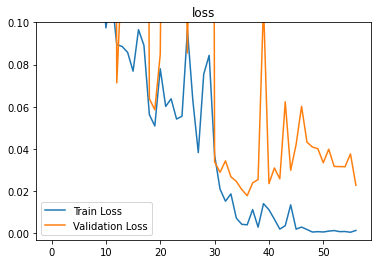

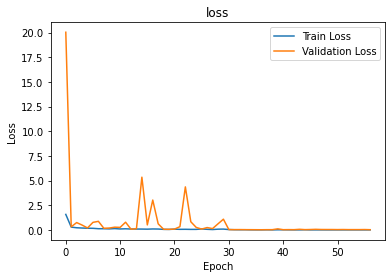

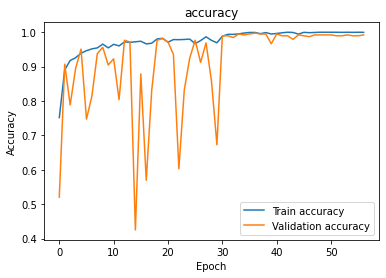

In [ ]:

loss = np.load(filepath+"loss.npy")
val_loss = np.load(filepath+"val_loss.npy")
accuracy = np.load(filepath+"accuracy.npy")
val_accuracy = np.load(filepath+"val_accuracy.npy")

plt.plot(loss, label = "Train Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.ylim(-0.003,0.1)
plt.savefig(filepath+"loss_.tif" ,dpi = 300)
plt.title('loss')
plt.show()

plt.plot(loss, label = "Train Loss")
plt.plot(val_loss, label = "Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and Validation Loss')
plt.savefig(filepath+"loss.tif" ,dpi = 300)
plt.title('loss')
plt.show()

plt.plot(accuracy, label = "Train accuracy")
plt.plot(val_accuracy, label = "Validation accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig(filepath+"accuracy.tif" ,dpi = 300)
plt.title('accuracy')
plt.show()

# Predict

In [ ]:
# Last------------------------------
print("------------------------------Last")
predict_last = model_last.predict(X_test)
model_last.evaluate(X_test, y_test)
y_pred_last = np.argmax(predict_last,axis=1)

# Best------------------------------
print("------------------------------Best")
predict_best = model_best.predict(X_test)
model_best.evaluate(X_test, y_test)
y_pred_best = np.argmax(predict_best,axis=1)

y_test_arg = np.argmax(y_test,axis=1)

------------------------------Last
13/13 [==============================] - 101s 6s/step - loss: 0.0074 - accuracy: 0.9974
------------------------------Best
13/13 [==============================] - 96s 6s/step - loss: 0.0133 - accuracy: 0.9948


#Classification report

In [ ]:
import sklearn.metrics as metrics
target_names = ['0', '1', '2']
print("last------------------------------\n"+metrics.classification_report(y_test_arg, y_pred_last, target_names=target_names, digits = 5))
print("best------------------------------\n"+metrics.classification_report(y_test_arg, y_pred_best, target_names=target_names, digits = 5))

last------------------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       119
           1    0.99259   1.00000   0.99628       134
           2    1.00000   0.99254   0.99625       134

    accuracy                        0.99742       387
   macro avg    0.99753   0.99751   0.99751       387
weighted avg    0.99744   0.99742   0.99742       387

best------------------------------
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       119
           1    1.00000   0.98507   0.99248       134
           2    0.98529   1.00000   0.99259       134

    accuracy                        0.99483       387
   macro avg    0.99510   0.99502   0.99502       387
weighted avg    0.99491   0.99483   0.99483       387



# Crossing matrix

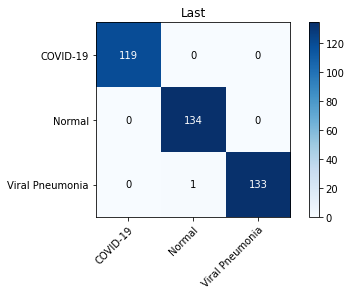

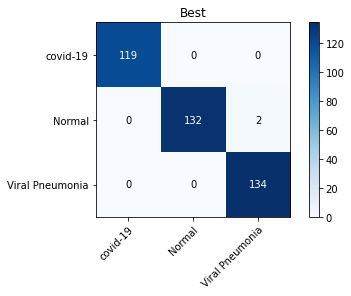

In [ ]:
# 0 covid-19, 
# last--------------------------------------------------
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
# import itertools

Actual = ["COVID-19", "Normal", "Viral Pneumonia"]
prediction = ["COVID-19", "Normal", "Viral Pneumonia"]
# for i in range(len(y_train[0])):
#   Actual.append(str(i))
#   prediction.append(str(i))
data = np.array(pd.crosstab(y_test_arg, y_pred_last, rownames=['Actual'],colnames=['prediction']))
harvest = data
fig, ax = plt.subplots()

plt.imshow(harvest,cmap=plt.cm.Blues)
plt.colorbar()
# We want to show all ticks...
ax.set_yticks(np.arange(harvest.shape[0]))
ax.set_xticks(np.arange(harvest.shape[1]))
# ... and label them with the respective list entries
ax.set_xticklabels(prediction)
ax.set_yticklabels(Actual)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
max_Value = 0
for i in range(harvest.shape[0]):
  for j in range(harvest.shape[1]):
    if max_Value < harvest[i, j]:
      max_Value = harvest[i, j]

for i in range(harvest.shape[0]):
  for j in range(harvest.shape[1]):
    text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="white" if harvest[i, j] > max_Value/2 else 'black')
fig.tight_layout()
plt.savefig(filepath+"Crossing_matrix_Last.tif" ,dpi = 300)
plt.title('Last')
plt.show()

# best--------------------------------------------------
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

Actual = ["covid-19", "Normal", "Viral Pneumonia"]
prediction = ["covid-19", "Normal", "Viral Pneumonia"]
# for i in range(len(y_train[0])):
#   Actual.append(str(i))
#   prediction.append(str(i))
  
data = np.array(pd.crosstab(y_test_arg, y_pred_best, rownames=['Actual'],colnames=['prediction']))
harvest = data
fig, ax = plt.subplots()

plt.imshow(harvest,cmap=plt.cm.Blues)
plt.colorbar()
# We want to show all ticks...
ax.set_yticks(np.arange(harvest.shape[0]))
ax.set_xticks(np.arange(harvest.shape[1]))

# ... and label them with the respective list entries
ax.set_xticklabels(prediction)
ax.set_yticklabels(Actual)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
# Loop over data dimensions and create text annotations.

max_Value = 0
for i in range(harvest.shape[0]):
  for j in range(harvest.shape[1]):
    if max_Value < harvest[i, j]:
      max_Value = harvest[i, j]

for i in range(harvest.shape[0]):
  for j in range(harvest.shape[1]):
    text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="white" if harvest[i, j]>max_Value/2 else 'black')
fig.tight_layout()
plt.savefig(filepath+"Crossing_matrix_Best.tif" ,dpi = 300)
plt.title('Best')
plt.show()